In [49]:
%load_ext autoreload
%autoreload 2
import numpy as np 
import matplotlib.pyplot as plt
from pypde.bases import *

N = 10

# Bases
CH = SpectralBase(N,"CH")
CD = SpectralBase(N,"CD")
DC = DirichletC(N)

# Space
x = CH.x
f = np.sin(np.pi*x)
df = -np.pi**2*np.sin(np.pi*x)

# Boundary conditions
#bc = np.zeros(2)
#bc[0] = -1

# Transform
fhatch = CH.forward_fft(f)
fhatcd = CD.forward_fft(f)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


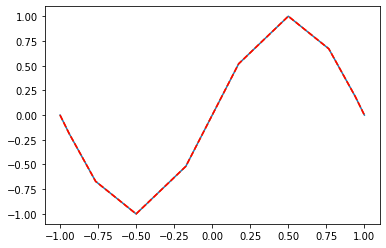

In [50]:
plt.plot(x,f)
plt.plot(x,CH.backward_fft(fhatch),"--")
plt.plot(x,CD.backward_fft(fhatcd),"r--")
plt.show()

## Derivative via recursion

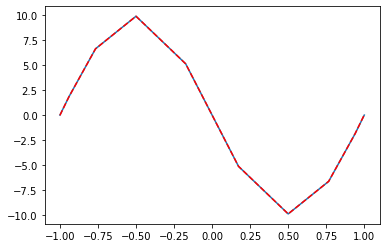

In [51]:
plt.plot(x,df)
plt.plot(x,CH.derivative(f,2),"r--")
plt.show()

## Derivative via matmul

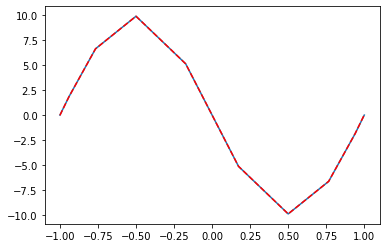

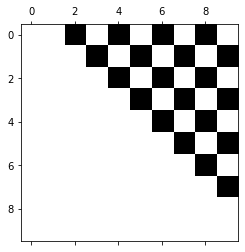

In [52]:
plt.plot(x,df)
fhat = CH.forward_fft(f)
dfhat = CH.dms(2)@fhat
plt.plot(x,CH.backward_fft(dfhat),"r--")
plt.show()
plt.spy(CH.dms(2))
plt.show()

## Derivative via pseudoinverse

In [61]:
CH._stiff_inv()

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.25      ,  0.        , -0.33333333,  0.        ,  0.08333333,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.08333333,  0.        , -0.125     ,  0.        ,
         0.04166667,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.04166667,  0.        , -0.06666667,
         0.        ,  0.025     ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.025     ,  0.        ,
        -0.04166667,  0.        ,  0.01666667,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.01666667,
         0.        , -0.02857143,  0.        

In [62]:
CH.stiff

array([[  0.,   0.,   4.,   0.,  32.,   0., 108.,   0., 256.,   0.],
       [  0.,   0.,   0.,  12.,   0.,  60.,   0., 168.,   0., 360.],
       [  0.,   0.,   0.,   0.,  24.,   0.,  96.,   0., 240.,   0.],
       [  0.,   0.,   0.,   0.,   0.,  40.,   0., 140.,   0., 324.],
       [  0.,   0.,   0.,   0.,   0.,   0.,  60.,   0., 192.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,  84.,   0., 252.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 112.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 144.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]])

In [63]:
CH.mass@CH.dms(2)

array([[  0.,   0.,   4.,   0.,  32.,   0., 108.,   0., 256.,   0.],
       [  0.,   0.,   0.,  12.,   0.,  60.,   0., 168.,   0., 360.],
       [  0.,   0.,   0.,   0.,  24.,   0.,  96.,   0., 240.,   0.],
       [  0.,   0.,   0.,   0.,   0.,  40.,   0., 140.,   0., 324.],
       [  0.,   0.,   0.,   0.,   0.,   0.,  60.,   0., 192.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,  84.,   0., 252.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 112.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 144.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]])